### 텍스트 분류 (Text Classification)
자연어 처리 기술을 활용해 특정 텍스트를 사람들이 정한 몇 가지 범주(Class) 중 어느 범주에 속하는지 분류하는 문제다.
- 2가지 범주 -> 2진분류
    - 스팸분류
    - 감정분류 (긍정 / 부정)
- 3가지 이상의 범주 -> 다중 범주 분류

### 텍스트 유사도
- 텍스트가 얼마나 유사한지를 표현하는 방식 중 하나.
- TF-IDF 활용
ex) 이 노래 누가 만들었어?  & 지금 노래 작곡가가 누구야?


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
sent=("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다","폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.")
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sent) # 문장 벡터화 실행

idf = tfidf_vectorizer.idf_
dict(zip(tfidf_vectorizer.get_feature_names(), idf)) # 각 수치에 대한 값 시각화

{'갑작스런': 1.4054651081081644,
 '내일': 1.4054651081081644,
 '놀러왔다가': 1.4054651081081644,
 '망연자실': 1.4054651081081644,
 '반가운': 1.4054651081081644,
 '서쪽': 1.4054651081081644,
 '소식': 1.4054651081081644,
 '오늘': 1.4054651081081644,
 '으로': 1.4054651081081644,
 '이어졌는데요': 1.4054651081081644,
 '인해': 1.4054651081081644,
 '있습니다': 1.0,
 '중심': 1.4054651081081644,
 '폭염': 1.0,
 '피해서': 1.4054651081081644,
 '하고': 1.4054651081081644,
 '휴일': 1.0}

### 자카드 유사도
두 문장을 각각 단어의 집합으로 만들어 두 집합을 통해 유사도를 측정하는 방식
- 두 집합의 교집합인 공통된 단어의 개수를 두 집합의 합집학, 전체 단어의 수로 나누면 된다.
- 결과값은 0과 1 사이로 나오고, 1에 가까울수록 유사도가 높다는 의미이다.

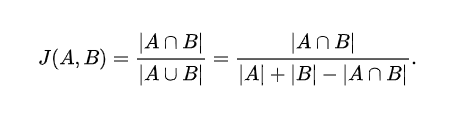

A={휴일, 인, 오늘, 도, 서쪽, 을, 중심, 으로, 폭염, 이, 이어졌는데요, 내일, 은, 반가운, 비 , 소식, 있습니다.}


B={폭염, 을, 피해서, 휴일, 에, 놀러왔다가, 갑작스런, 비, 로, 인해, 망연자실, 하고, 있습니다.}

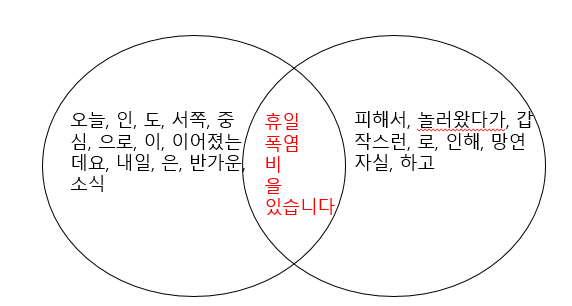

### 코사인 유사도
두 개의 벡터값에서 코사인 각도를 구하는 방법이다. 
- 두 문장이 유사하다면 같은 방향, 아닐수록 직교로 표현될 것

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2]) #첫번째와 두번째 문장 비교

array([[0.17952266]])

### 유클리디언 유사도 (L2-Distance)

In [6]:
from sklearn.metrics.pairwise import euclidean_distances

euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.28099753]])

위 결과가 1보다 큰 것을 볼 수 있다. 유클리디언 유사도는 두 점 사이의 거리를 뜻하기 때문에 값에 제한이 없다.
- 따라서 0과 1 사이의 값을 갖도록 일반화를 해야한다 ( L1 정규화 방법 사용)
    - L1 정규화 방법 :
        - 각 벡터 안의 요소 값을 모두 더한 것의 크기가 1이 되도록 벡터들의 크기를 조절하는 방법

In [8]:
import numpy as np
def l1_normalize(v):
    norm = np.sum(v)
    return v/norm

tfidf_norm_l1 = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm_l1[0:1], tfidf_norm_l1[1:2])

array([[0.20491229]])

### 맨하탄 유사도  ( L1-Distance)
맨하탄 거리를 통해 유사도를 측정하는 방법
- 사각형 격자로 이뤄진 지도에서 출발점에서 도착점까지를 가로지르지 않고 갈 수 있는 최단거리를 구하는 공식
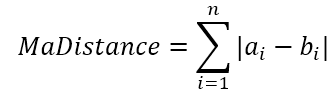
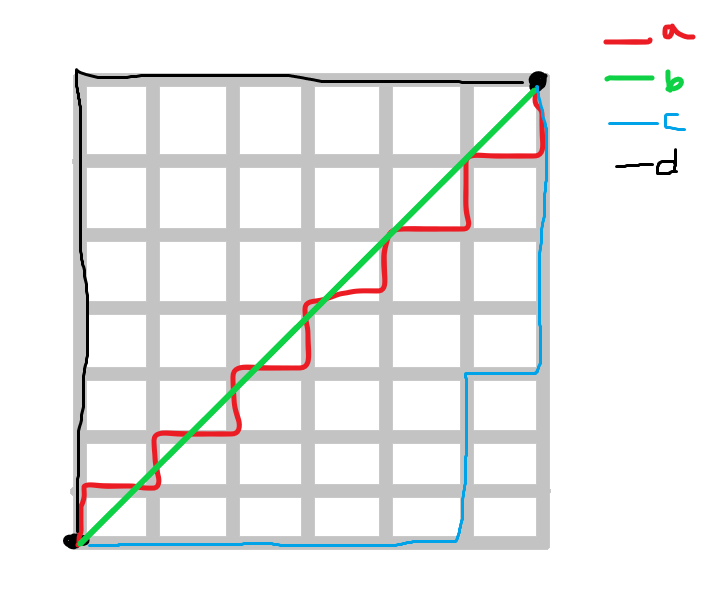


유클리디언 거리(L2거리) : 검정색
맨하탄 거리 : 파란색


In [9]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm_l1[0:1],tfidf_norm_l1[1:])

array([[0.77865927]])

유사도가 가장 높게 나온것을 알 수 있다. 측정 방법에 따라서 유사도가 크게 달라지므로 적합한 방법을 고르는 것이 중요!!!